In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr
import skimage

def is_cat(x): return x[0].isupper()

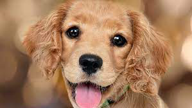

In [3]:
im = PILImage.create('Dog.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

/home/jack/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


('False', tensor(0), tensor([9.9995e-01, 5.1218e-05]))

In [6]:
#|export
categories = ('Dog','Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [7]:
classify_image(im)

{'Dog': 0.9999487400054932, 'Cat': 5.121831418364309e-05}

In [8]:
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."

In [9]:
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"

In [10]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['Dog.jpg','Cat.jpg','DogCat.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f5d1cda8ee0>,
 'http://127.0.0.1:7860/',
 None)

In [11]:
interpretation='default'
enable_queue=True

In [12]:
m = learn.model

In [13]:
ps = list(m.parameters())

In [14]:
ps[1]

Parameter containing:
tensor([ 2.3532e-01,  2.6711e-01, -5.1096e-08,  5.1703e-01,  3.4404e-09,
         2.2236e-01,  4.2136e-01,  1.3153e-07,  2.5234e-01,  1.5152e-06,
         3.1680e-01,  2.4778e-01,  3.7890e-01,  1.0862e-05,  2.7515e-01,
         2.3752e-01,  2.4186e-01,  3.9407e-01,  4.6862e-01,  2.9020e-01,
         2.7151e-01,  2.7820e-01,  2.9074e-01,  2.0487e-01,  2.6023e-01,
         2.7775e-01,  2.9265e-01,  3.1585e-01,  3.8752e-01,  3.0455e-01,
         2.6713e-01,  2.1207e-01,  2.8719e-01,  3.3273e-01,  4.2679e-01,
         3.7354e-01,  7.4804e-08,  1.9030e-01,  1.4740e-08,  2.2530e-01,
         1.8001e-01,  2.4755e-01,  2.7374e-01,  2.5899e-01,  2.9401e-01,
         2.9993e-01,  2.2322e-01,  2.6375e-01,  2.2001e-08,  2.6563e-01,
         2.2172e-01,  2.8452e-01,  3.3147e-01,  2.2754e-01,  3.6605e-01,
         2.1161e-01,  2.3832e-01,  2.4952e-01,  5.2613e-01,  2.4867e-01,
         2.9496e-01,  2.5869e-01,  4.8316e-01,  2.6730e-01],
       requires_grad=True)

In [15]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [16]:
ps[0]

Parameter containing:
tensor([[[[-1.0371e-02, -6.0737e-03, -1.7333e-03,  ...,  5.6638e-02,
            1.7043e-02, -1.2758e-02],
          [ 1.1178e-02,  9.6355e-03, -1.0981e-01,  ..., -2.7118e-01,
           -1.2907e-01,  3.7211e-03],
          [-6.8638e-03,  5.9185e-02,  2.9559e-01,  ...,  5.1977e-01,
            2.5635e-01,  6.3599e-02],
          ...,
          [-2.7453e-02,  1.6144e-02,  7.2696e-02,  ..., -3.3275e-01,
           -4.2049e-01, -2.5774e-01],
          [ 3.0674e-02,  4.1065e-02,  6.2963e-02,  ...,  4.1391e-01,
            3.9368e-01,  1.6613e-01],
          [-1.3681e-02, -3.5849e-03, -2.3989e-02,  ..., -1.5065e-01,
           -8.2174e-02, -5.7240e-03]],

         [[-1.1323e-02, -2.6540e-02, -3.4532e-02,  ...,  3.2586e-02,
            6.5361e-04, -2.5781e-02],
          [ 4.5812e-02,  3.3743e-02, -1.0437e-01,  ..., -3.1242e-01,
           -1.6047e-01, -1.2708e-03],
          [-7.3293e-04,  9.8534e-02,  4.0224e-01,  ...,  7.0797e-01,
            3.6893e-01,  1.2462e-01]

In [17]:
#This part is for exporting
from nbdev.export import notebook2script

In [18]:
notebook2script('app.ipynb')

Converted app.ipynb.
